# Übung 5 - DT, Gradient Boosting und Random Forest für Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

Wir verwenden wieder die Kundendaten. Diesmal wollen wir keine Klassifikation nach high_revenue durchführen, sondern direkt den numerischen Wert Umsatz (total_sum) vorhersagen.

In [4]:
# CSV Datei einlesen
df = pd.read_csv('01_Kundendaten.csv') 
df

,customerID,gender,age_first_order,user_agent_brand,user_agent_os,ip_address_geopoint,ip_address_city,ip_address_region,ip_address_country_code,campaign,pages_visited_avg,total_sum,count
0,000759,M,19.0,Chrome,MacOS X,POINT(126.9741 37.5112),NaN,NaN,KR,True,13.666667,146.0,3
1,000759,M,NaN,Firefox,Linux,POINT(-97.822 37.751),NaN,NaN,US,False,13.666667,146.0,3
2,001571,M,38.0,Chrome,MacOS X,POINT(121.5318 25.0478),Taipei,Taipei City,TW,False,13.333333,66.0,3
3,002453,F,42.0,Chrome,MacOS X,POINT(139.69 35.69),NaN,NaN,JP,True,12.333333,93.0,3
4,004074,M,NaN,Chrome,Windows,POINT(-71.5213 42.9403),Bedford,New Hampshire,US,True,9.000000,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10782,zrek5b,NaN,12.0,Firefox,Windows,POINT(4.8995 52.3824),NaN,NaN,NL,False,15.000000,23.0,1
10783,ztjfjb,F,28.0,Chrome,Windows,POINT(126.9741 37.5112),NaN,NaN,KR,False,9.000000,24.0,1
10784,zuso5k,F,48.0,Chrome,MacOS X,POINT(14.5051 46.0511),Ljubljana,Ljubljana,SI,True,9.666667,114.0,3
10785,zxl3kv,M,NaN,IE,Windows,POINT(-86.149 39.6224),Greenwood,Indiana,US,False,3.000000,60.0,1


## 5.1 Behandlung von fehlenden Werten
Zunächst beginnen wir auch hier mit einer Behandlung der fehlenden Werte.

In [5]:
from sklearn import preprocessing

dfFilter = df[['gender','age_first_order','user_agent_brand',
         'user_agent_os', 'campaign', 'pages_visited_avg', 'total_sum']]

dfCopy = dfFilter.copy()

dfCopy['gender'] = dfCopy['gender'].fillna(dfCopy['gender'].mode()[0])
dfCopy['age_first_order'] = dfCopy['age_first_order'].fillna(df['age_first_order'].mode()[0])
dfCopy.head()

,gender,age_first_order,user_agent_brand,user_agent_os,campaign,pages_visited_avg,total_sum
0,M,19.0,Chrome,MacOS X,True,13.666667,146.0
1,M,65.0,Firefox,Linux,False,13.666667,146.0
2,M,38.0,Chrome,MacOS X,False,13.333333,66.0
3,F,42.0,Chrome,MacOS X,True,12.333333,93.0
4,M,65.0,Chrome,Windows,True,9.000000,23.0


## 5.2 Kodierung relevanter Attribute
In der Dokumentation der zu verwendenden Algorithmen ist ersichtlich, dass die Daten numerisch vorliegen müssen. Versuchen Sie dies nachzuvollziehen. Warum reicht hier ein Label Encoder aus? Warum muss nicht normiert werden?

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

In [10]:
labelenc = preprocessing.LabelEncoder()
labelenc.fit(dfCopy.gender)
dfCopy['gender'] = labelenc.transform(dfCopy.gender)

labelenc.fit(dfCopy.user_agent_os)
dfCopy['user_agent_os'] = labelenc.transform(dfCopy.user_agent_os)

labelenc.fit(dfCopy.user_agent_brand)
dfCopy['user_agent_brand'] = labelenc.transform(dfCopy.user_agent_brand)

dfCopy["campaign"] = dfCopy["campaign"].astype(int)
dfCopy.head(40)

,gender,age_first_order,user_agent_brand,user_agent_os,campaign,pages_visited_avg,total_sum
0,1,19.0,0,1,1,13.666667,146.0
1,1,65.0,2,0,0,13.666667,146.0
2,1,38.0,0,1,0,13.333333,66.0
3,0,42.0,0,1,1,12.333333,93.0
4,1,65.0,0,2,1,9.000000,23.0
5,1,72.0,0,2,0,12.000000,17.5
6,0,35.0,0,1,0,13.000000,23.0
7,0,67.0,2,2,0,8.666667,1179.0
8,0,63.0,0,2,0,14.500000,62.0
9,0,44.0,0,2,0,14.250000,184.0


Außerdem möchte die Fachabteilung das Alter diskretisieren, da dieses persönliche Merkmal demnächst aus Datenschutz- und Akzeptanzgründen nur noch in folgenden Intervallen ['bis 20', '20-30', '30-40', '40-50', '50-60', '60-70', 'über 70' ] abgefragt werden soll.

In [28]:
dfPrepared = dfCopy.copy()
bin_labels_alt = [0, 1, 2, 3, 4, 5, 6]
dfPrepared['age_first_order'] = pd.cut(x = dfPrepared['age_first_order'],
                              bins=[0, 20, 30, 40, 50, 60, 70, 100],
                              labels = bin_labels_alt)
dfPrepared.head()

,gender,age_first_order,user_agent_brand,user_agent_os,campaign,pages_visited_avg,total_sum
0,1,0,0,1,1,13.666667,146.0
1,1,5,2,0,0,13.666667,146.0
2,1,2,0,1,0,13.333333,66.0
3,0,3,0,1,1,12.333333,93.0
4,1,5,0,2,1,9.000000,23.0


## 5.3 Training der Algorithmen mit k-fold Cross-Validation
Im Folgenden sollen drei baumbasierte Methoden der Vorlesung "Überwachte Methoden Teil 2" angewendet werden. Dazu soll eine 10-fold Cross-Validation angewendet und anschließend das Modell anhand von statistischen Kennzahlen bewertet werden.
Nutzen Sie jeweils die Funktion cross_val_predict(modell, x,y,cv=10) für die Cross-Validation.

In [29]:
from sklearn.model_selection import cross_val_predict, cross_validate
import sklearn.metrics as metrics

x = dfPrepared.drop(['total_sum'], axis = 1)
y = dfPrepared['total_sum'].astype(int)

#### A1: Decision Tree Regressor
Trainieren Sie mit Nutzung von cross_val_predict(XYregressor, x,y,cv=10) unter https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html?highlight=cross_val_predict#sklearn.model_selection.cross_val_predict


In [35]:
from sklearn.tree import DecisionTreeRegressor
XYregressor = DecisionTreeRegressor(random_state=0)

y_pred = cross_val_predict(XYregressor, x,y,cv=10)

Metriken für die Auswertung:

In [36]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y,y_pred)

print("Ergebnisse von sklearn.metrics:\n")
print("R-Squared:", r2)
print()

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Ergebnisse von sklearn.metrics:

R-Squared: -0.28507364448478123

MAE: 111.43884714712661
MSE: 62404.28534608934
RMSE: 249.80849734564543


#### A2: Random Forest Regressor
Trainiern Sie wie oben.

In [37]:
from sklearn.ensemble import RandomForestRegressor
XYregressor = RandomForestRegressor(max_depth=2, random_state=0)

y_pred = cross_val_predict(XYregressor, x,y,cv=10)

In [38]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y,y_pred)

print("Ergebnisse von sklearn.metrics:\n")
print("R-Squared:", r2)
print()

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Ergebnisse von sklearn.metrics:

R-Squared: 0.09817288875070385

MAE: 103.29808781582774
MSE: 43793.50290527807
RMSE: 209.26897262919334


#### A3: Gradient Boost Trees (Regression)
Trainiern Sie wie oben.

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
XYregressor = GradientBoostingRegressor(random_state=0)

y_pred = cross_val_predict(XYregressor, x,y,cv=10)

In [40]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y,y_pred)

print("Ergebnisse von sklearn.metrics:\n")
print("R-Squared:", r2)
print()

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Ergebnisse von sklearn.metrics:

R-Squared: 0.17734486430429608

MAE: 92.83158690993295
MSE: 39948.84343765602
RMSE: 199.87206767744215


## 5.4 Interpretation der Gütekriterien
Interpretieren Sie die Gütekriterien und treffen Sie eine Aussage zur Nutzbarkeit der Modelle.

## 5.5 Mehrere Modelle gleichzeitig trainieren und visuell vergleichen
Gehen Sie den Code unten durch und vollziehen Sie die einzelnen Schritte nach. Was sagt Ihnen die Visualisierung?

In [41]:
import time

estimators = [('DT', DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf = 5)),
    ('RF', RandomForestRegressor(min_samples_split = 10, min_samples_leaf = 5, n_estimators = 100)), 
              ('GB', GradientBoostingRegressor(n_estimators = 100, max_depth = 4))]

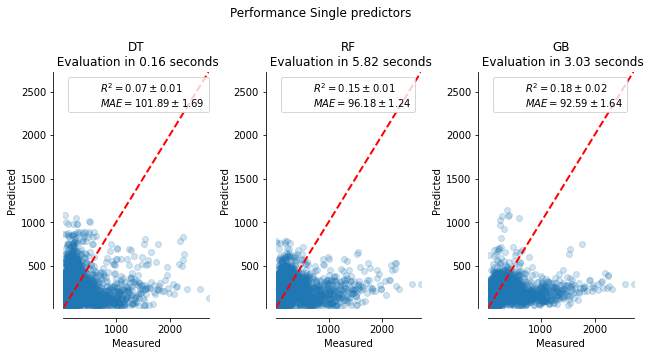

In [42]:
def plot_regression_results(ax, y, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y.min(), y.max()],
            [y.min(), y.max()],
            '--r', linewidth=2)
    ax.scatter(y, y_pred, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y.min(), y.max()])
    ax.set_ylim([y.min(), y.max()])
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title + '\n Evaluation in {:.2f} seconds'.format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(1, 3, figsize=(9, 5))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
    start_time = time.time()
    score = cross_validate(est, x, y,
                           scoring=['r2', 'neg_mean_absolute_error'],
                           n_jobs=-1, verbose=0)
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, x, y, n_jobs=-1, verbose=0)

    plot_regression_results(
        ax, y, y_pred,
        name,
        (r'$R^2={:.2f} \pm {:.2f}$' + '\n' + r'$MAE={:.2f} \pm {:.2f}$')
        .format(np.mean(score['test_r2']),
                np.std(score['test_r2']),
                -np.mean(score['test_neg_mean_absolute_error']),
                np.std(score['test_neg_mean_absolute_error'])),
        elapsed_time)

plt.suptitle('Performance Single predictors')
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()